In [2]:
# 1.1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
# Load the dataset
df = pd.read_csv('./Data/metadata.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2520\4091681889.py:2: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Data/metadata.csv')


In [4]:
# Preview the data
def preview_data(df):
    print("First 5 rows:")
    print(df.head())
    print("\nDataFrame Info:")
    print(df.info())
    print("\nShape:", df.shape)

preview_data(df)


First 5 rows:
   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11

## Data Cleaning and Preparation

In [5]:
# Check missing values
def missing_values(df):
    missing = df.isnull().sum().sort_values(ascending=False)
    print("Missing values per column:")
    print(missing)

missing_values(df)


Missing values per column:
mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
pdf_json_files       682894
sha                  682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
abstract             235544
journal               87322
s2_id                 80192
authors               23869
publish_time           1814
title                   503
license                   0
source_x                  0
cord_uid                  0
dtype: int64


In [6]:
# Clean the data
def clean_data(df):
    df_clean = df.copy()
    df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
    df_clean['year'] = df_clean['publish_time'].dt.year
    df_clean['abstract_word_count'] = df_clean['abstract'].fillna('').apply(lambda x: len(x.split()))
    return df_clean

df_clean = clean_data(df)

In [7]:
# Summary statistics
def summary_stats(df):
    print("\nSummary statistics:")
    print(df.describe())

summary_stats(df_clean)


Summary statistics:
                        publish_time  mag_id         s2_id           year  \
count                         518871     0.0  9.764680e+05  518871.000000   
mean   2020-06-11 15:10:50.013586688     NaN  2.175871e+08    2019.961944   
min              1856-04-01 00:00:00     NaN  9.600000e+01    1856.000000   
25%              2020-08-06 00:00:00     NaN  2.211411e+08    2020.000000   
50%              2021-03-17 00:00:00     NaN  2.320829e+08    2021.000000   
75%              2021-10-19 00:00:00     NaN  2.373948e+08    2021.000000   
max              2024-04-20 00:00:00     NaN  2.491936e+08    2024.000000   
std                              NaN     NaN  5.312281e+07       3.537352   

       abstract_word_count  
count         1.056660e+06  
mean          1.646091e+02  
min           0.000000e+00  
25%           5.500000e+01  
50%           1.790000e+02  
75%           2.470000e+02  
max           1.800000e+04  
std           1.242203e+02  


## Data Analysis and Visualization

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6464\4286835519.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')


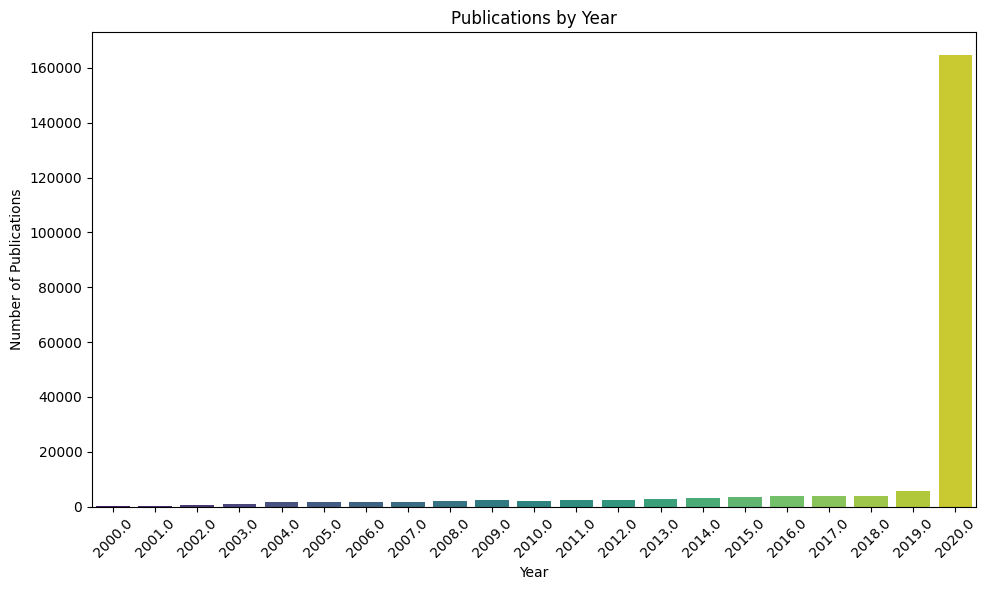

In [8]:
# Publications by year
def plot_publications_by_year(df,start_year,end_year):
    df_filtered = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    year_counts = df_filtered['year'].value_counts().sort_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
    plt.title('Publications by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_publications_by_year(df_clean,2000,2020)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6464\1114504661.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_journals.index, x=top_journals.values, palette='mako')


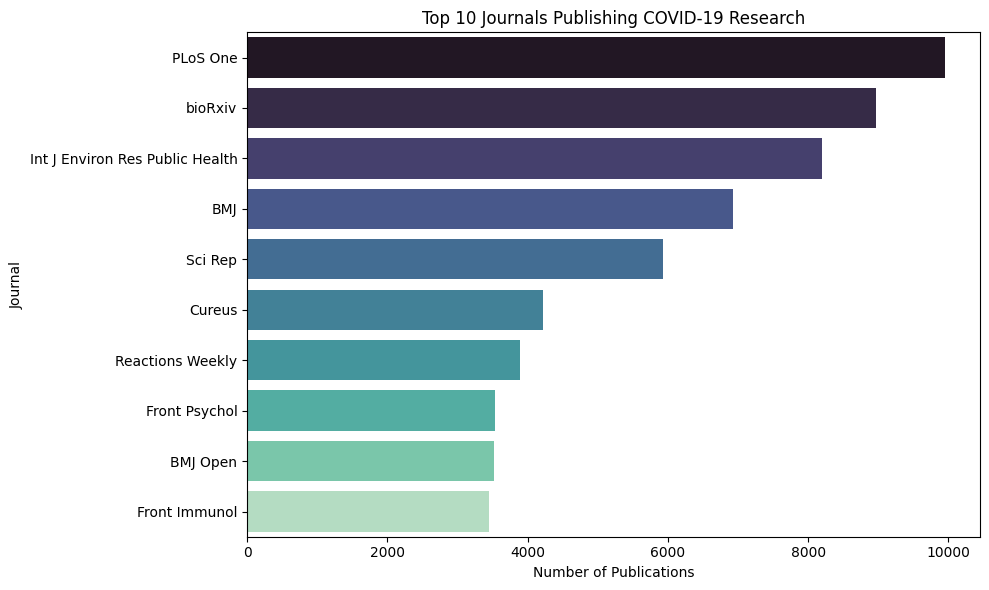

In [9]:
# Top journals
def plot_top_journals(df, top_n=10):
    top_journals = df['journal'].value_counts().head(top_n)
    plt.figure(figsize=(10,6))
    sns.barplot(y=top_journals.index, x=top_journals.values, palette='mako')
    plt.title(f'Top {top_n} Journals Publishing COVID-19 Research')
    plt.xlabel('Number of Publications')
    plt.ylabel('Journal')
    plt.tight_layout()
    plt.show()

plot_top_journals(df_clean)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6464\786059081.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=source_counts.index, x=source_counts.values, palette='coolwarm')


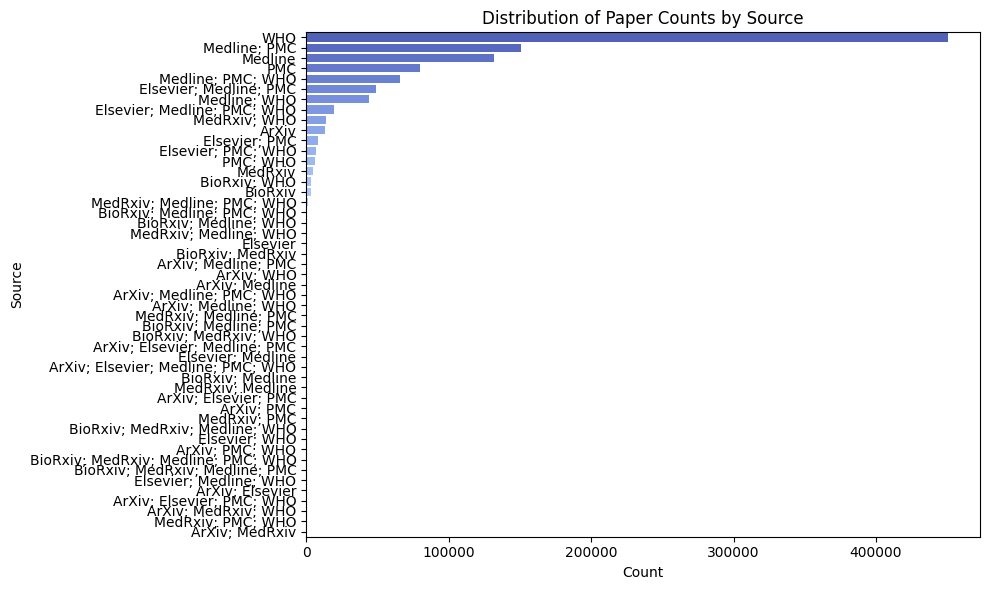

In [ ]:
#source distribution
def plot_source_distribution(df):
    source_counts = df['source_x'].value_counts()
    plt.figure(figsize=(10,6))
    sns.barplot(y=source_counts.index, x=source_counts.values, palette='coolwarm')
    plt.title('Distribution of Paper Counts by Source')
    plt.ylabel('Source')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

plot_source_distribution(df_clean)